# Question Set: Exploratory Data Analysis (EDA) and Machine Learning

### 1: Exploratory Data Analysis (EDA)

#### 1.1 Dataset discription 

- I'd be happy to provide you with a brief overview of a housing price dataset:

> `Source`: The housing price dataset is typically collected from various real estate sources, government agencies, or private companies that track real estate transactions and property values.

> `Purpose`: The purpose of the housing price dataset is to provide information and insights into the real estate market's trends, dynamics, and fluctuations. It is used by various stakeholders, including real estate agents, buyers, sellers, investors, policymakers, and researchers, to analyze and understand factors influencing property prices.

> `Context`: The dataset contains information about properties, such as their location, size, type (e.g., single-family home, condominium, apartment), features (e.g., number of bedrooms, bathrooms, amenities), and historical transaction data (e.g., sale prices, listing prices, time on market). This data is often used for purposes such as market analysis, price forecasting, property valuation, risk assessment, and trend identification.

Analyzing this dataset can help stakeholders make informed decisions about buying or selling properties, identifying potential investment opportunities, understanding market trends, and formulating effective real estate policies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

# Ignore specific warning
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('housing.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
print(dataset.columns)
print(dataset.shape)
print(dataset.sample(10))

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
(20640, 10)
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8551     -118.35     33.88                25.0       1459.0           362.0   
10292    -117.81     33.88                19.0       2265.0           283.0   
3186     -119.79     36.29                 6.0       1265.0           227.0   
8115     -118.20     33.80                42.0       4577.0          1146.0   
3245     -119.57     36.10                37.0       1676.0           316.0   
13511    -117.32     34.11                38.0       1462.0           337.0   
24       -122.27     37.84                52.0       2224.0           437.0   
4077     -118.35     34.15                52.0       1680.0           238.0   
18714    -122.42     40.57                10.0       7949.0        

       
- In the given dataset there are `206401` rows and `10` columns are avialable those are follows :-


> `longitude` - Latitude: Latitude is the measurement of a location's north-south position on the Earth's surface. It is measured in degrees, minutes, and seconds, with the equator as the reference point at 0 degrees latitude

> `latitube` - Longitude, on the other hand, measures the east-west position of a location. It is also measured in degrees, minutes, and seconds, with the prime meridian (which passes through Greenwich, London) serving as the reference point at 0 degrees longitude.

> `housing_median_age` - , the feature "housing_median_age" refers to the median age of houses in a specific area or neighborhood. It is a descriptive statistic that provides insights into the overall age distribution of the housing units in a given location.

> `total_rooms` -  "total_rooms" typically refers to the total number of rooms in a residential property.

> `total_bedrooms` -  "total_bedrooms" refers to the total number of bedrooms in a residential property.

> `population`- The total number of people living in a specific geographical area, such as a neighborhood, city, or region.

> `households`-The total number of occupied housing units in a given area.

> `median_income` -The middle value of the income distribution for a particular area

> `median_house_values` - The middle value of the property prices in a specific area. 

> `ocean_proximity`-  A categorical feature indicating how close each property is to the ocean or another body of water. 

## 1.2 Data Exploration

In [4]:
# size of the dataset 
print(" The shape of the given dataset is =",dataset.shape)
print("-"*60)
print(" The total number of rows ",dataset.shape[0]," and  numbers of columns",dataset.shape[1]) 

 The shape of the given dataset is = (20640, 10)
------------------------------------------------------------
 The total number of rows  20640  and  numbers of columns 10


> we can see that after printing the shape of the dataset we total size of the dataset= `20640`,`10`

> Using the shape and index  we found the  total `20640` rows and ` 10` columns

In [5]:
# finding the missing the values 
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- After Analysing the null values count ,we found the __total_bedrooms__ have __`207`__ null values 


- We will remove or drop those __`207`__ null values using __dropona()__ function 

In [6]:
dataset.dropna(subset=['total_bedrooms'],inplace=True)

We  remove the null values from the  __`total_bedrooms`__  

lets see ! 

In [7]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

•	Identify the data types of each column. Are they consistent with your expectations?

In [8]:
# printing the data types of the dataset 
print(dataset.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


 except __`ocean_proximity`__ others are the catogorical dataset 

 #### Calculate summary statistics (mean, median, min, max, etc.) for relevant columns.

In [9]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
col=dataset.drop(['ocean_proximity','longitude','latitude'],axis=1)
# Loop through the columns and calculate/print statistics
for column in col:
    col_mean = dataset[column].mean()
    col_min = dataset[column].min()
    col_median = dataset[column].median()
    col_max = dataset[column].max()
    print(f"Statistics for column '{column}':")
    print(f"Mean: {col_mean}")
    print(f"Min: {col_min}")
    print(f"Median: {col_median}")
    print(f"Max: {col_max}")
    print("--" * 30)


Statistics for column 'housing_median_age':
Mean: 28.633093525179856
Min: 1.0
Median: 29.0
Max: 52.0
------------------------------------------------------------
Statistics for column 'total_rooms':
Mean: 2636.5042333480155
Min: 2.0
Median: 2127.0
Max: 39320.0
------------------------------------------------------------
Statistics for column 'total_bedrooms':
Mean: 537.8705525375618
Min: 1.0
Median: 435.0
Max: 6445.0
------------------------------------------------------------
Statistics for column 'population':
Mean: 1424.9469485635982
Min: 3.0
Median: 1166.0
Max: 35682.0
------------------------------------------------------------
Statistics for column 'households':
Mean: 499.43346547251997
Min: 1.0
Median: 409.0
Max: 6082.0
------------------------------------------------------------
Statistics for column 'median_income':
Mean: 3.8711616013312273
Min: 0.4999
Median: 3.5365
Max: 15.0001
------------------------------------------------------------
Statistics for column 'median_house_v

## 1.3 Data Visualization:

### Create visualizations to understand the distribution of key numerical variables (e.g., histograms, box plots).

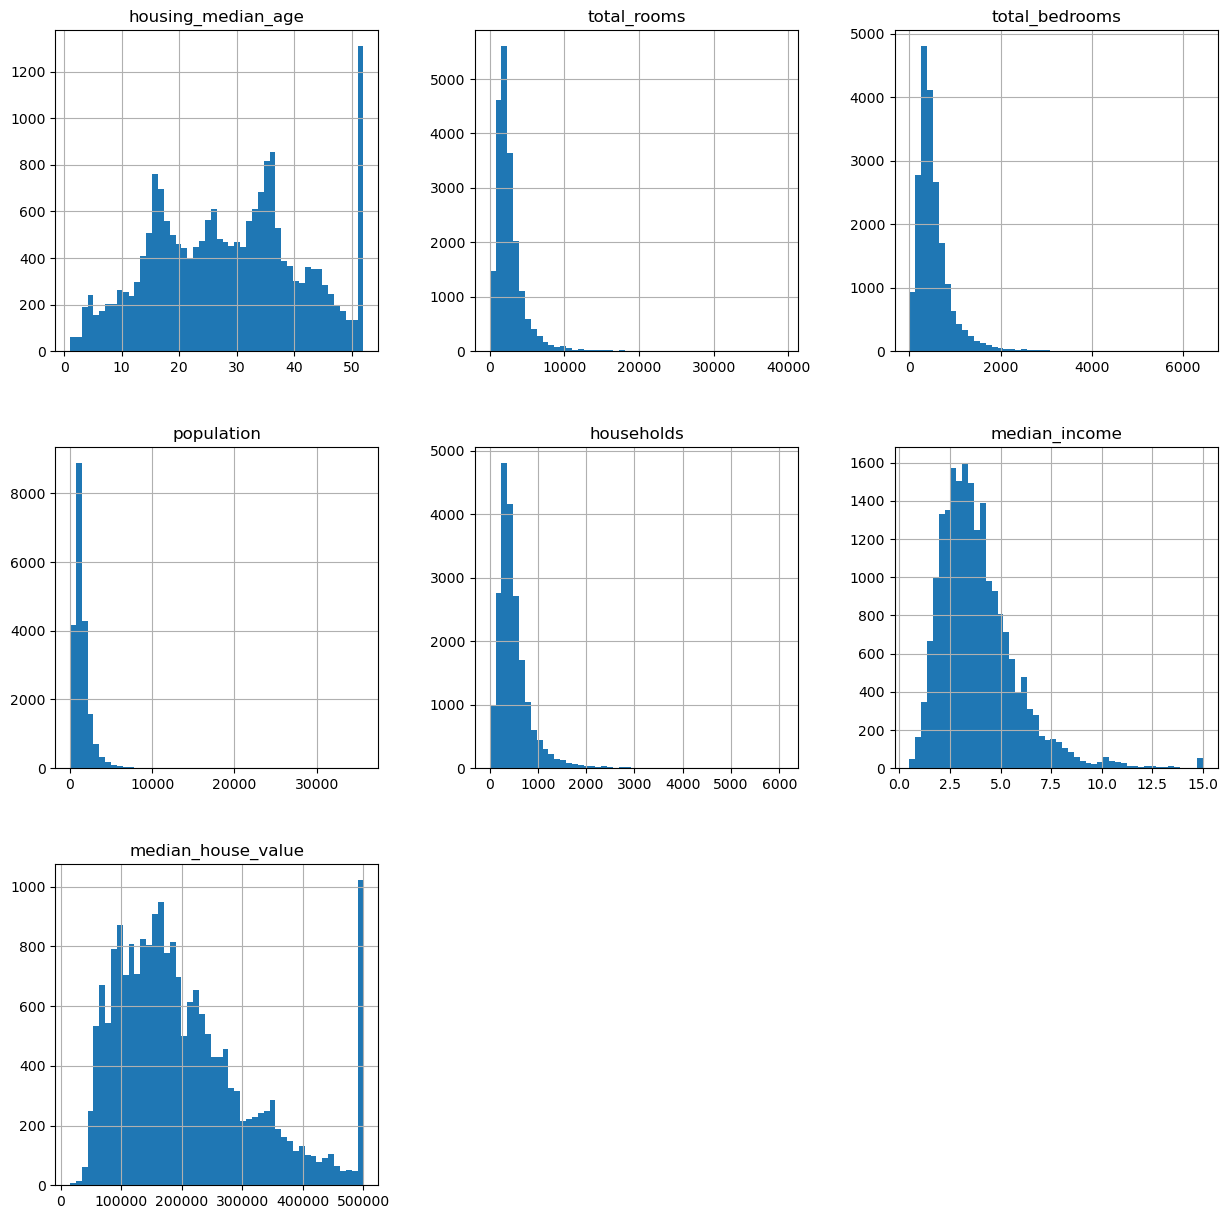

In [11]:
df=dataset.drop(['longitude','latitude'],axis=1)
df.hist(bins=50,figsize=(15,15))
plt.show()

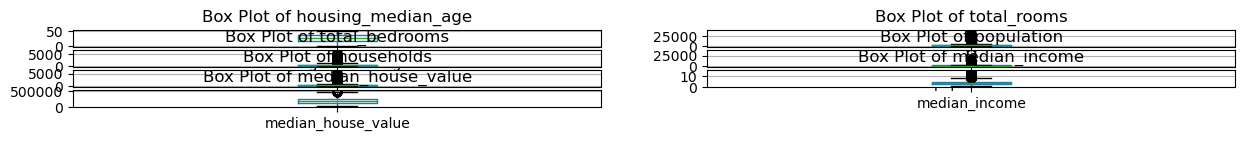

In [12]:
columns_to_plot = ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', ]

# Calculate the number of rows and columns for the subplot grid
num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2  # Divide by 2 to get the number of rows (rounded up)
num_cols = 2  # Two columns in each row

# Create a new figure with the specified size
plt.figure(figsize=(15, 1))

# Loop through the columns and create box plots in subplots
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    dataset.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

After analysing box plot we can see there are lots of outliers.lets do operation on the outliers 

In [13]:
Q1=dataset['total_bedrooms'].quantile(0.25)
Q3=dataset['total_bedrooms'].quantile(0.75)
IQR=Q3-Q1
HIGH=Q3+1.5*IQR
LOW=Q1-1.5*IQR
new_df=dataset.copy()
new_df['total_bedrooms']=np.where(
    new_df['total_bedrooms']>HIGH,HIGH,
        np.where(
        new_df['total_bedrooms']<LOW,LOW,
            new_df['total_bedrooms']
))
#new_df.boxplot(['total_bedrooms'],figsize=(5,5))


In [14]:

# filling the ooutliers from the total_rooms 
q1=new_df['total_rooms'].quantile(0.25)
q3=new_df['total_rooms'].quantile(.75)
iqr=q3-q1
high=q3+1.5*iqr
low=q1-1.5*iqr
new_df=new_df.copy()
new_df['total_rooms']=np.where(
    new_df['total_rooms']>high,high,
        np.where(
        new_df['total_rooms']<low,low,
            new_df['total_rooms']
))
#new_df.boxplot(['total_rooms'],figsize=(5,5))

In [15]:
# filling the outliers from population 
q1=new_df['population'].quantile(.25)
q3=new_df['population'].quantile(.75)
IQR=q3-q1

# we can see in above population .there is lots of outliers in high side ,lets fill them with high values 
high=q3+1.5*IQR
#low=q1-1.5*IQR

new_df=new_df.copy()
new_df['population']=np.where(new_df['population']>high,high,new_df['population'])

In [16]:
# opeartion with households
q1=new_df['households'].quantile(.25)
q3=new_df['households'].quantile(.75)
IQR=q3-q1

high=q3+1.5*IQR

new_df=new_df.copy()
new_df['households']=np.where(new_df['households']>high,high,new_df['households'])

In [17]:
# median_income 
q1=new_df['median_income'].quantile(.25)
q3=new_df['median_income'].quantile(.75)
IQR=q3-q1

high=q3+1.5*IQR
new_df=new_df.copy()
new_df['median_income']=np.where(new_df['median_income']>high,high,new_df['median_income'])


### lets see the all relevent columns after filling the outliers 

In [18]:
dataset=new_df.copy()

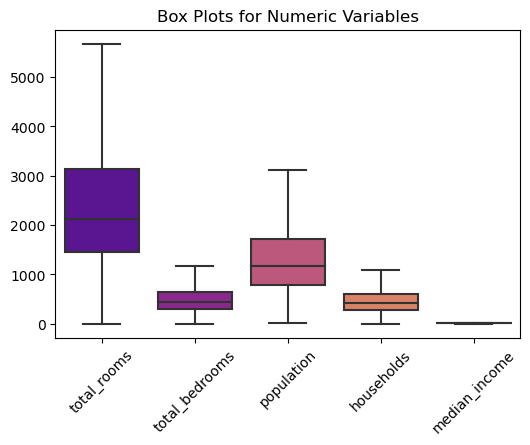

In [19]:
columns_for_boxplot = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
plt.figure(figsize=(6, 4))
sns.boxplot(data=dataset[columns_for_boxplot], palette='plasma')
plt.title('Box Plots for Numeric Variables')
plt.xticks(rotation=45)
plt.show()


__we can see we fill the all outliers__

### •	Plot the relationship between categorical and numerical variables (e.g., bar plots).

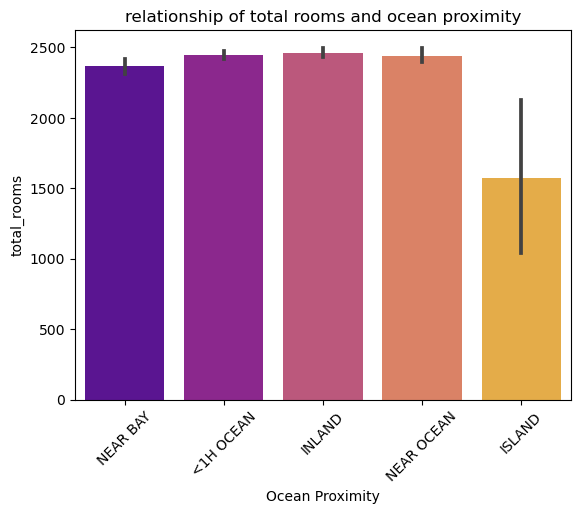

In [20]:


sns.barplot(x='ocean_proximity', y='total_rooms', data=dataset, palette='plasma')

    # Customize the plot
plt.xlabel('Ocean Proximity')
plt.ylabel('total_rooms')
plt.title("relationship of total rooms and ocean proximity")
plt.xticks(rotation=45)
plt.show()

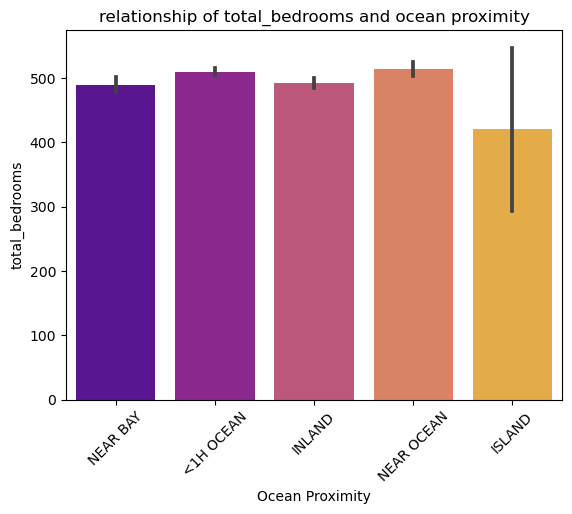

In [21]:
sns.barplot(x='ocean_proximity', y='total_bedrooms', data=dataset, palette='plasma')
 # Customize the plot
plt.xlabel('Ocean Proximity')
plt.ylabel('total_bedrooms')
plt.title("relationship of total_bedrooms and ocean proximity")
plt.xticks(rotation=45)
plt.show()

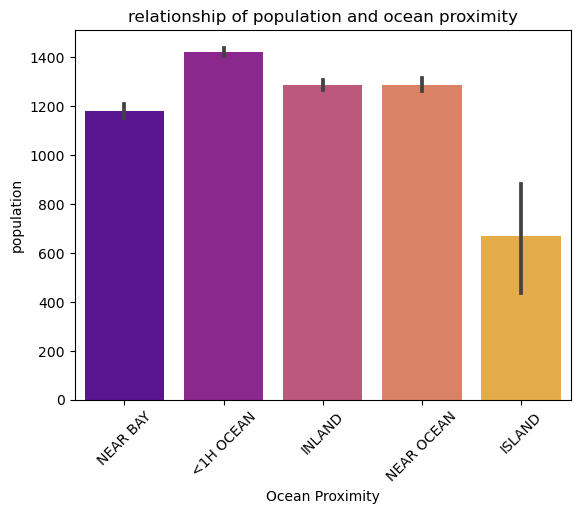

In [22]:
sns.barplot(x='ocean_proximity', y='population', data=dataset, palette='plasma')


plt.xlabel('Ocean Proximity')
plt.ylabel('population')
plt.title("relationship of population and ocean proximity")
plt.xticks(rotation=45)
plt.show()

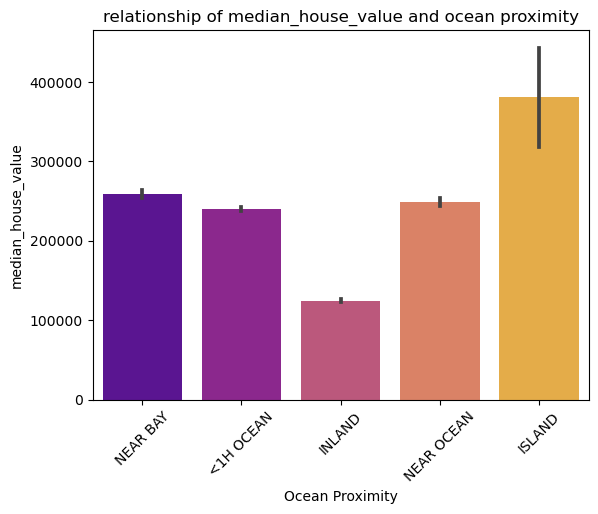

In [23]:
sns.barplot(x='ocean_proximity', y='median_house_value', data=dataset, palette='plasma')


plt.xlabel('Ocean Proximity')
plt.ylabel('median_house_value')
plt.title("relationship of median_house_value and ocean proximity")
plt.xticks(rotation=45)
plt.show()

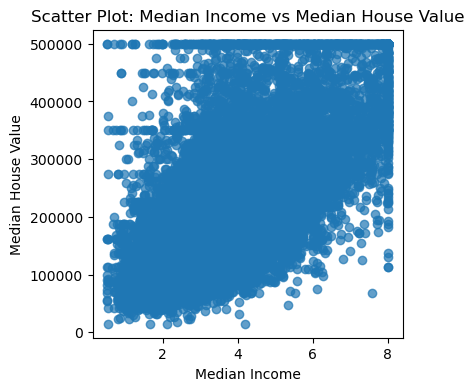

In [24]:
plt.figure(figsize=(4, 4))  
plt.scatter(dataset['median_income'], dataset['median_house_value'],cmap='plasma', alpha=0.7)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot: Median Income vs Median House Value')

plt.show()

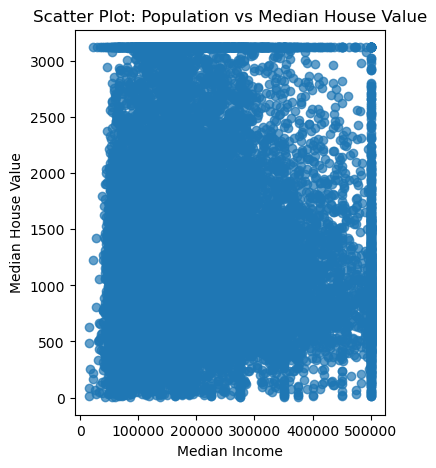

In [25]:
plt.figure(figsize=(4, 5))  
plt.scatter( dataset['median_house_value'],dataset['population'],cmap='plasma', alpha=0.7)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot: Population vs Median House Value')

plt.show()

# Part 2: Machine Learning

## 2.1  Feature Engineerings :

__Identify which columns are potential features and which one is the target variable.__

After analysing the all the columns we found that the __potentail feature__ are :

`'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'ocean_proximity'`

And the __Target variable__ are 

`'median_house_value'`

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## 2.2 Data Preparation:

In [27]:
# importing the train test split 
from sklearn.model_selection import train_test_split

X=dataset.drop(['median_house_value','longitude','latitude'],axis=1)
y=dataset['median_house_value']


X['ocean_proximity']=X['ocean_proximity'].map({'ISLAND':0,'NEAR BAY':1,'NEAR OCEAN':2,'<1H OCEAN':3,'ISLAND':4})
# split the data into training and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=46)


•	Preprocess the data (scaling, encoding categorical variables, etc.).

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [30]:
X_train_scale=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale=pd.DataFrame(X_test_scale,columns=X_test.columns)

## Model Training and Evaluation

In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [32]:
model.fit(X_train_scale,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
model_pred=model.predict(X_test_scale)

#### •	Evaluate the model's performance on the testing set using appropriate metrics 

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print("The mean absolute error",mean_absolute_error(y_test,model_pred))
print("The meas sqared error ",mean_squared_error(y_test,model_pred))
model_MSE=mean_squared_error(y_test,model_pred)
print("Root mean squered error",np.sqrt(model_MSE))
print("R2 score ",r2_score(y_test,model_pred))

In [ ]:
model_rmse=np.sqrt(model_MSE)
model_rmse

# Cross validation on Random Forest Regressor

In [ ]:
from sklearn.model_selection import cross_val_score
model_scores=cross_val_score(model,X_train_scale,y_train,scoring='neg_mean_squared_error',cv=10)
model_rmse_score=np.sqrt(-model_scores)
model_rmse_score

In [ ]:
def print_score(model_scores):
    print("Score :",model_rmse_score)
    print("\n Standard Deviaion",model_scores.std())
    print("\n Mean :",model_rmse_score.mean())
    
print_score(model_rmse_score)

- Model Outputs:
 >1.Linear Regression
      Standard Deviation : 2589.874518913006
      Mean : 68675.89772703737

 >2.Decision Tree Regressor
      Standard Deviation : 2256.5161177098134
      Mean : 84166.48758365476
   
 >3.Random Forest Regression
      Standard Deviation : 2107.775203550
      Mean : 60367.57962123413

In [ ]:
importance=model.feature_importances_
print("Feature Importance",importance)

# feature Importances Calculation 

> Feature Importance Calculation:-
 - The code claculates feature importance using __`model.feature_importance__`__ attrubute of the trained Random Forest model.
 - This attribute provides a measure of how much feature contribute to the models prediction 

> Printing Feature Importances:-
 - The Calculate feature importance are printed using `(print("Feature Importance",importance)`

# Saving The Model :-
    

In [ ]:
from joblib import dump,load
dump(model,'House_Priceing1.joblib')

# Testing the Model On Test Data 

In [ ]:
model_rmse

In [ ]:
y_test.values 

In [ ]:
model_pred

In [ ]:
X_test_scale.values[0]

# Using the Model

In [ ]:
model=load('House_Priceing.joblib')

In [ ]:
feature=np.array([[-0.91780829, -0.26607395, -0.42160692, -0.3967314 , -0.41677713,
       -0.00672869,  0.38152548]])
model.predict(feature)